0- Installazione pacchetti ed import

In [1]:
pip install pyclustering

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils

In [3]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

1 - CLUSTERING CAM DATASET

In [4]:
filename='CAM-dataset/datasetCam.csv'
separator=';'
dataCAM= pd.read_csv(filename, sep=separator)

In [5]:
dataCAM.head()

,source,destination,messageID,referencePositionLat,referencePositionLong,referencePositionAlt,simulationTime,isSpecialVehicle,causeCodeIfSpecial,stationType,Unnamed: 10
0,18,NaN,2,487669280,114602490,800001,0.659493,N,NaN,5,NaN
1,92,NaN,2,487659630,114599970,800001,0.786275,N,NaN,5,NaN
2,18,NaN,2,487669310,114602500,800001,0.859765,N,NaN,5,NaN
3,92,NaN,2,487659650,114599980,800001,0.986003,N,NaN,5,NaN
4,18,NaN,2,487669360,114602510,800001,1.159490,N,NaN,5,NaN


In [6]:
columnsname= ['source','referencePositionLat','referencePositionLong','referencePositionAlt']
data_position=dataCAM[columnsname].astype(float)

In [7]:
data_position.head()

,source,referencePositionLat,referencePositionLong,referencePositionAlt
0,18.0,487669280.0,114602490.0,800001.0
1,92.0,487659630.0,114599970.0,800001.0
2,18.0,487669310.0,114602500.0,800001.0
3,92.0,487659650.0,114599980.0,800001.0
4,18.0,487669360.0,114602510.0,800001.0


In [8]:
sample=data_position.values.tolist()
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(sample, amount_initial_centers).initialize()
xmeans_instance = xmeans(sample, initial_centers, 40)
xmeans_instance.process()
clusters1= xmeans_instance.get_clusters()
centroids1= xmeans_instance.get_centers()

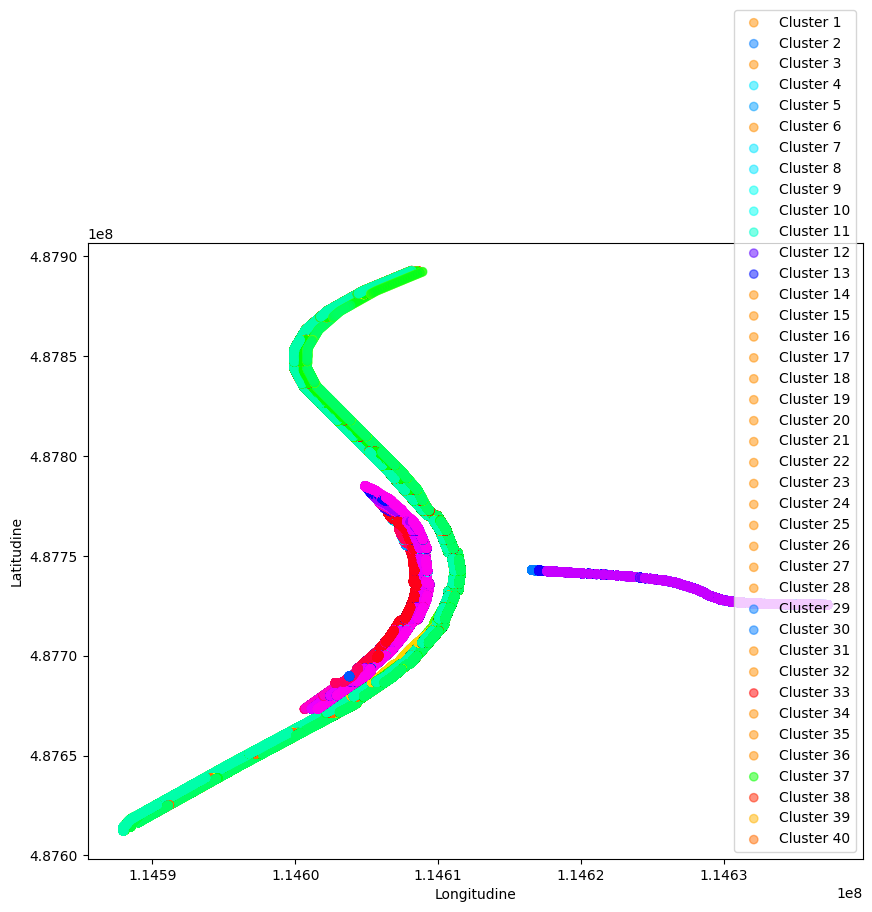

In [9]:
utils.plot_clustering(sample,clusters1)

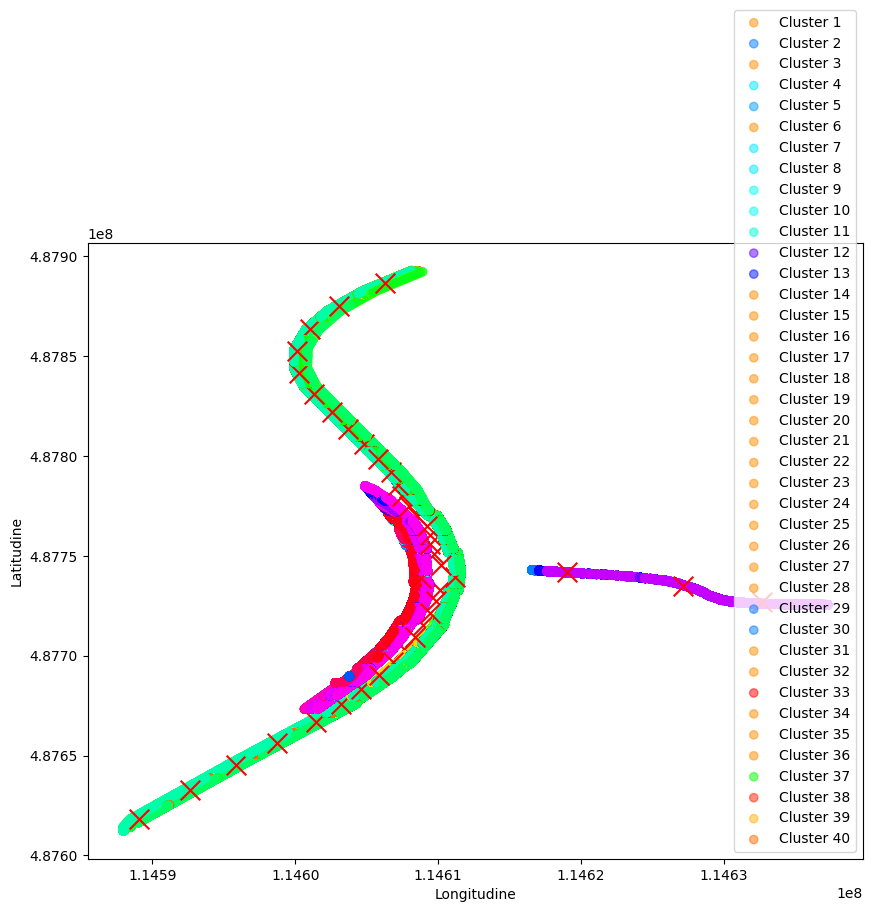

In [10]:
utils.plot_clustering_with_centroids(sample,clusters1,centroids1)

2 - CLUSTERING DENM DATASET

In [11]:
filename2='DENM-dataset/datasetDen.csv'
separator=';'
dataDENM= pd.read_csv(filename2, sep=separator)

In [12]:
dataDENM.head()

,source,destination,messageID,actionID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,termination,stationType,Unnamed: 17
0,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
1,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
2,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
3,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
4,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN


In [13]:
columnsname2= ['source','eventPos_lat','eventPos_long','eventPos_alt']
data_position2=dataDENM[columnsname2].astype(float)

In [14]:
data_position2.head()

,source,eventPos_lat,eventPos_long,eventPos_alt
0,166.0,487672120.0,114603240.0,800001.0
1,166.0,487672120.0,114603240.0,800001.0
2,166.0,487672120.0,114603240.0,800001.0
3,166.0,487672120.0,114603240.0,800001.0
4,166.0,487672120.0,114603240.0,800001.0


In [15]:
#sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
sample2=data_position2.values.tolist()
amount_initial_centers2 = 2
initial_centers2 = kmeans_plusplus_initializer(sample2, amount_initial_centers2).initialize()
xmeans_instance2 = xmeans(sample2, initial_centers2, 40)
xmeans_instance2.process()
clusters2= xmeans_instance2.get_clusters()
centroids2= xmeans_instance2.get_centers()

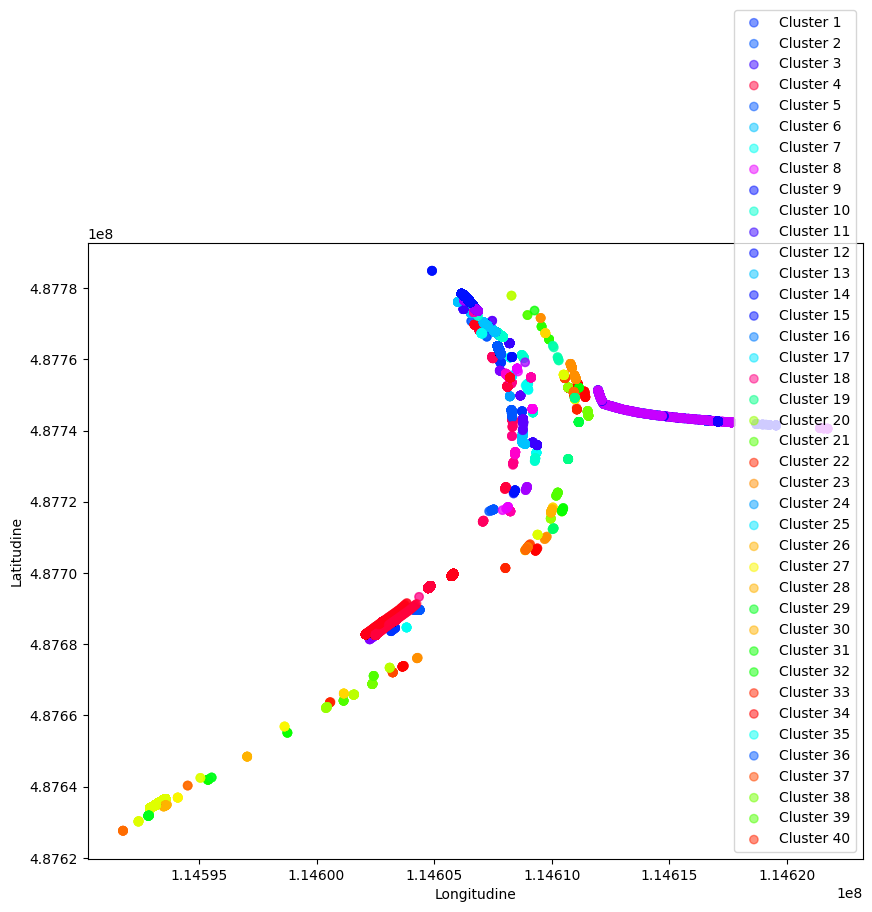

In [16]:
utils.plot_clustering(sample2,clusters2)

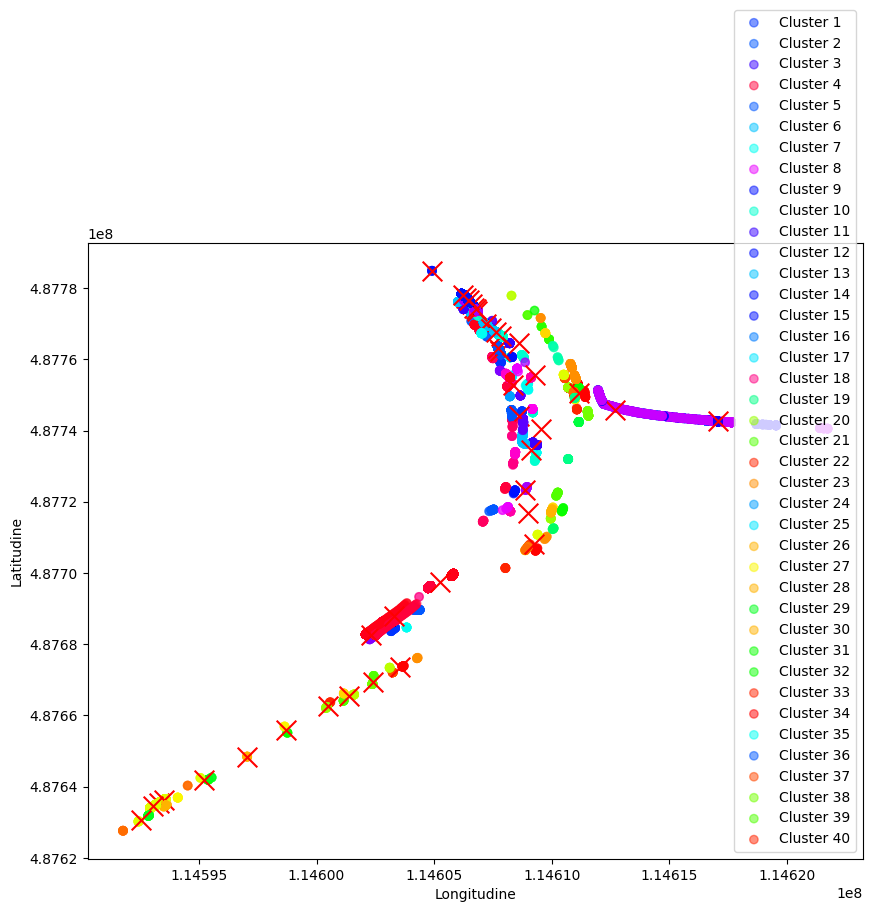

In [17]:
utils.plot_clustering_with_centroids(sample2,clusters2,centroids2)

Plotting dei clustering di entrambi i dataset

c:\Users\Acer\Dropbox\PC\Desktop\attivitaprogettuale\attprog_sec\utils.py:78: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_data[:, 2], cluster_data[:, 1], c=cluster_color, alpha=0.5, label=f'Cluster 1-{i+1}')


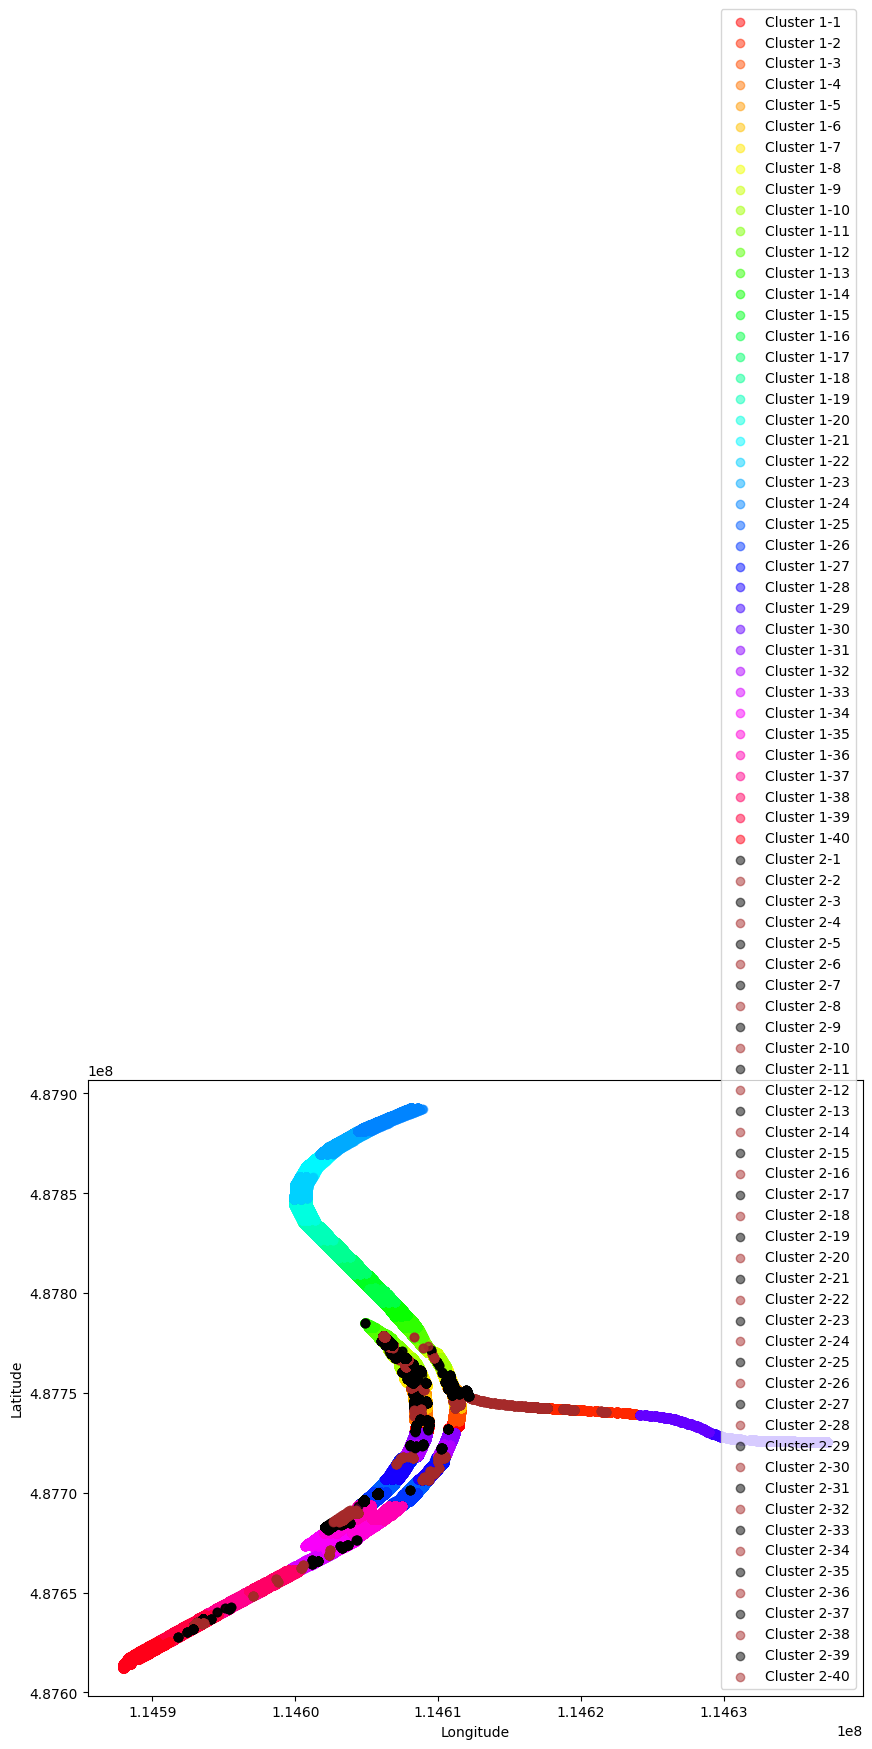

In [18]:
utils.plot_two(sample,sample2,clusters1,clusters2)

3 - CLUSTERING DELL'INTERO DATASET DENM

In [19]:
import struct

In [20]:
def hex_to_float(hex_string):
    int_value = int(hex_string, 16)
    # Usa la funzione struct.unpack per convertire l'intero in un float
    float_value = struct.unpack('f', struct.pack('I', int_value))[0]
    return float_value


In [21]:
dataDENM.head()

,source,destination,messageID,actionID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,termination,stationType,Unnamed: 17
0,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
1,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
2,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
3,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
4,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN


In [22]:
column_nan=dataDENM.columns[dataDENM.isna().all()].tolist()
column_nan

['destination', 'termination', 'Unnamed: 17']

In [23]:
datadropped= dataDENM.drop(columns=column_nan)
datadropped

,source,messageID,actionID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,stationType
0,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,0
1,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,0
2,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,0
3,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,0
4,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595987,3052,1,3052:5258,1,1,0,1856,425563814200,425563814200,673.2740,487682610,114602500,800001,0x560b09c19c50,0
595988,3126,1,3126:5849,1,1,0,1856,425563873200,425563873200,673.3320,487682780,114602090,800001,0x560b0a191e30,0
595989,3052,1,3052:5848,1,1,0,1856,425563873200,425563873200,673.3340,487682610,114602500,800001,0x560b09b35ac0,0
595990,3126,1,3126:5260,1,1,0,1856,425563814300,425563814300,673.3920,487682780,114602090,800001,0x560b0a0d6320,0


In [24]:
# Converti la colonna esadecimale in float
datadropped['relevanceDistance'] = datadropped['relevanceDistance'].apply(lambda x: int(x, 16)).astype(float)

In [25]:
datadropped.head()

,source,messageID,actionID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,stationType
0,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0
1,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0
2,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0
3,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0
4,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0


In [26]:
# Creazione di due nuove colonne per separare l'ID
datadropped[['Numero_ID', 'Identificatore']] = datadropped['actionID'].str.split(':', expand=True)

# Converti la colonna 'Numero_ID' in float
datadropped['Numero_ID'] = datadropped['Numero_ID'].astype(float)
datadropped['Identificatore'] = datadropped['Identificatore'].astype(float)

In [27]:
datadropped= datadropped.drop(columns='actionID')

In [28]:
datadropped.head()

,source,messageID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,stationType,Numero_ID,Identificatore
0,166,1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0,166.0,1.0
1,166,1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0,166.0,1.0
2,166,1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0,166.0,1.0
3,166,1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0,166.0,1.0
4,166,1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0,166.0,1.0


In [29]:
datadropped =datadropped.astype(float)

In [30]:
datadropped.head()

,source,messageID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,stationType,Numero_ID,Identificatore
0,166.0,1.0,1.0,97.0,1229.0,80.0,4.255632e+11,4.255632e+11,7.1387,487672120.0,114603240.0,800001.0,9.460541e+13,0.0,166.0,1.0
1,166.0,1.0,1.0,97.0,1229.0,80.0,4.255632e+11,4.255632e+11,7.1387,487672120.0,114603240.0,800001.0,9.460541e+13,0.0,166.0,1.0
2,166.0,1.0,1.0,97.0,1229.0,80.0,4.255632e+11,4.255632e+11,7.1387,487672120.0,114603240.0,800001.0,9.460541e+13,0.0,166.0,1.0
3,166.0,1.0,1.0,97.0,1229.0,80.0,4.255632e+11,4.255632e+11,7.1387,487672120.0,114603240.0,800001.0,9.460541e+13,0.0,166.0,1.0
4,166.0,1.0,1.0,97.0,1229.0,80.0,4.255632e+11,4.255632e+11,7.1387,487672120.0,114603240.0,800001.0,9.460541e+13,0.0,166.0,1.0


In [31]:
sample3=datadropped.values.tolist()
amount_initial_centers3 = 2
initial_centers3 = kmeans_plusplus_initializer(sample3, amount_initial_centers3).initialize()
xmeans_instance3 = xmeans(sample3, initial_centers3, 40)
xmeans_instance3.process()
clusters3= xmeans_instance3.get_clusters()
centroids3= xmeans_instance3.get_centers()

4- CLUTERING INTERO DATASET CAM

In [32]:
dataCAM.head()

,source,destination,messageID,referencePositionLat,referencePositionLong,referencePositionAlt,simulationTime,isSpecialVehicle,causeCodeIfSpecial,stationType,Unnamed: 10
0,18,NaN,2,487669280,114602490,800001,0.659493,N,NaN,5,NaN
1,92,NaN,2,487659630,114599970,800001,0.786275,N,NaN,5,NaN
2,18,NaN,2,487669310,114602500,800001,0.859765,N,NaN,5,NaN
3,92,NaN,2,487659650,114599980,800001,0.986003,N,NaN,5,NaN
4,18,NaN,2,487669360,114602510,800001,1.159490,N,NaN,5,NaN


In [33]:
column_nanCAM=dataCAM.columns[dataCAM.isna().all()].tolist()
column_nanCAM

['destination', 'causeCodeIfSpecial', 'Unnamed: 10']

In [34]:
datadroppedCAM= dataCAM.drop(columns=column_nanCAM)
datadroppedCAM

,source,messageID,referencePositionLat,referencePositionLong,referencePositionAlt,simulationTime,isSpecialVehicle,stationType
0,18,2,487669280,114602490,800001,0.659493,N,5
1,92,2,487659630,114599970,800001,0.786275,N,5
2,18,2,487669310,114602500,800001,0.859765,N,5
3,92,2,487659650,114599980,800001,0.986003,N,5
4,18,2,487669360,114602510,800001,1.159490,N,5
...,...,...,...,...,...,...,...,...
368395,1276,2,487874420,114603610,800001,113.199000,N,5
368396,1128,2,487891780,114608740,800001,113.291000,N,5
368397,1276,2,487874950,114603740,800001,113.399000,N,5
368398,1128,2,487892300,114608920,800001,113.491000,N,5


In [35]:
def letter_to_binary(letter):
    unicode_value = ord(letter)
    binary_representation = bin(unicode_value)[2:]  # Rimuovi il prefisso '0b'
    return binary_representation


In [36]:
datadroppedCAM['isSpecialVehicle'] = datadroppedCAM['isSpecialVehicle'].apply(letter_to_binary)


In [37]:
def binary_to_float(binary):
    decimal_value = int(binary, 2)
    return float(decimal_value)

In [38]:
datadroppedCAM['isSpecialVehicle'] = datadroppedCAM['isSpecialVehicle'].apply(binary_to_float)

In [39]:
datadroppedCAM.head()

,source,messageID,referencePositionLat,referencePositionLong,referencePositionAlt,simulationTime,isSpecialVehicle,stationType
0,18,2,487669280,114602490,800001,0.659493,78.0,5
1,92,2,487659630,114599970,800001,0.786275,78.0,5
2,18,2,487669310,114602500,800001,0.859765,78.0,5
3,92,2,487659650,114599980,800001,0.986003,78.0,5
4,18,2,487669360,114602510,800001,1.159490,78.0,5


In [40]:
datadroppedCAM =datadroppedCAM.astype(float)

In [41]:
sample4=datadroppedCAM.values.tolist()
amount_initial_centers4 = 2
initial_centers4 = kmeans_plusplus_initializer(sample4, amount_initial_centers4).initialize()
xmeans_instance4 = xmeans(sample4, initial_centers4, 20)
xmeans_instance4.process()
clusters4= xmeans_instance4.get_clusters()
centroids4= xmeans_instance4.get_centers()

5- Clustering svolto considerando l'event type come parametro di rilevanza

In [42]:
columnsnameEVENT= ['source','eventPos_lat','eventPos_long','eventPos_alt', 'situation_eventType']
data_positionEVENT=dataDENM[columnsnameEVENT].astype(float)

In [43]:
sampleE=data_positionEVENT.values.tolist()
amount_initial_centersE = 2
initial_centersE = kmeans_plusplus_initializer(sampleE, amount_initial_centersE).initialize()
xmeans_instanceE = xmeans(sampleE, initial_centersE, 3)
xmeans_instanceE.process()
clustersE= xmeans_instanceE.get_clusters()
centroidsE= xmeans_instanceE.get_centers()

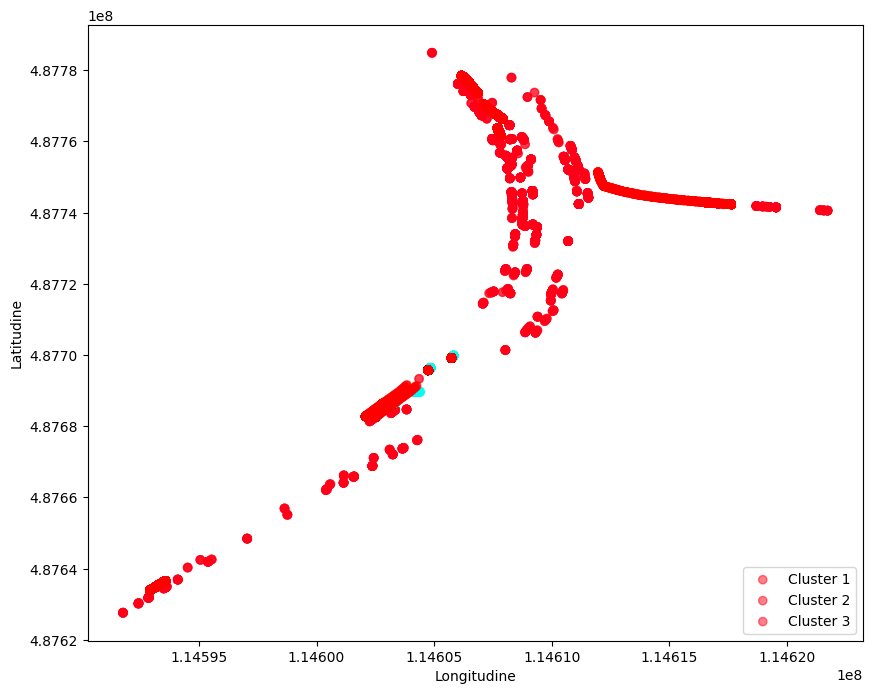

In [44]:
utils.plot_clustering_event(sampleE,clustersE)

6- Sporcatura del dataset denm

In [45]:
columnsdirty= ['source','eventPos_lat','eventPos_long','eventPos_alt']
datadirty=dataDENM[columnsdirty]

In [46]:
datadirty.head()

,source,eventPos_lat,eventPos_long,eventPos_alt
0,166,487672120,114603240,800001
1,166,487672120,114603240,800001
2,166,487672120,114603240,800001
3,166,487672120,114603240,800001
4,166,487672120,114603240,800001


In [47]:

# Funzione per calcolare nuove coordinate (latitudine e longitudine) date coordinate di partenza
def nuove_coordinate(latitudine, longitudine):
    mean = 0  # Media della distribuzione gaussiana
    std_deviation = 1
    variazione_metri = np.random.normal(mean, std_deviation) * 100  
    metri_per_grado_lat = 111320.0 
    metri_per_grado_long = 111320.0 * np.cos(np.radians(latitudine/1e7)) 
    variazione_gradi = variazione_metri / metri_per_grado_lat
    variazione_gradi_long = variazione_metri / metri_per_grado_long
  
    # Calcola le nuove coordinate
    nuova_latitudine = round(latitudine + variazione_gradi*1e7)
    nuova_longitudine = round(longitudine + variazione_gradi_long*1e7)

    return nuova_latitudine, nuova_longitudine

In [48]:
# Modifica delle coordinate ogni 1000esima entry
counter= 0
for i in range(0, len(datadirty)-1, 10000):
    lat = datadirty.loc[i, 'eventPos_lat']
    long = datadirty.loc[i, 'eventPos_long']
    counter= counter+1
    nuova_lat, nuova_long = nuove_coordinate(lat, long) 
    #print(lat, 'lat')
    #print(long, 'long')
    datadirty.loc[i, 'eventPos_lat'] = nuova_lat 
    datadirty.loc[i, 'eventPos_long'] = nuova_long 
    print(nuova_lat ,'latitudine,' ,nuova_long ,'longitudine')
print(counter)

487664759 latitudine, 114592072 longitudine
487626667 latitudine, 114579347 longitudine
487644600 latitudine, 114608569 longitudine
487639995 latitudine, 114599369 longitudine
487639822 latitudine, 114598732 longitudine
487628091 latitudine, 114581508 longitudine
487757769 latitudine, 114599888 longitudine
487765417 latitudine, 114605262 longitudine
487759457 latitudine, 114593015 longitudine
487774191 latitudine, 114604483 longitudine
487746820 latitudine, 114583870 longitudine
487754479 latitudine, 114595493 longitudine
487770378 latitudine, 114609098 longitudine
487779796 latitudine, 114632586 longitudine
487763048 latitudine, 114608496 longitudine
487773087 latitudine, 114623728 longitudine
487789510 latitudine, 114625075 longitudine
487772711 latitudine, 114600907 longitudine
487762767 latitudine, 114599043 longitudine
487761256 latitudine, 114593265 longitudine
487754590 latitudine, 114596748 longitudine
487754647 latitudine, 114588484 longitudine
487763260 latitudine, 114609904 

C:\Users\Acer\AppData\Local\Temp\ipykernel_19392\3049091341.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadirty.loc[i, 'eventPos_lat'] = nuova_lat
C:\Users\Acer\AppData\Local\Temp\ipykernel_19392\3049091341.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadirty.loc[i, 'eventPos_long'] = nuova_long


In [49]:
pd.set_option('display.float_format', '{:.6f}'.format)

datadirty.head()

,source,eventPos_lat,eventPos_long,eventPos_alt
0,166,487664759,114592072,800001
1,166,487672120,114603240,800001
2,166,487672120,114603240,800001
3,166,487672120,114603240,800001
4,166,487672120,114603240,800001


In [50]:
'''
for i in np.arange(0,590000,200):
  print(datadirty.iloc[i])
'''

'\nfor i in np.arange(0,590000,200):\n  print(datadirty.iloc[i])\n'

In [51]:
data_positionDIRTY=datadirty.astype(float) 

In [52]:
data_positionDIRTY.head()

,source,eventPos_lat,eventPos_long,eventPos_alt
0,166.000000,487664759.000000,114592072.000000,800001.000000
1,166.000000,487672120.000000,114603240.000000,800001.000000
2,166.000000,487672120.000000,114603240.000000,800001.000000
3,166.000000,487672120.000000,114603240.000000,800001.000000
4,166.000000,487672120.000000,114603240.000000,800001.000000


In [53]:
#sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
sampleD=data_positionDIRTY.values.tolist()
amount_initial_centersD = 2
initial_centersD = kmeans_plusplus_initializer(sampleD, amount_initial_centersD).initialize()
xmeans_instanceD = xmeans(sampleD, initial_centersD, 40)
xmeans_instanceD.process()
clustersD= xmeans_instanceD.get_clusters()
centroidsD= xmeans_instanceD.get_centers()

In [54]:
dataset = datadropped.copy()
dataset = dataset.drop(columns='Numero_ID')
dataset = dataset.drop(columns='Identificatore')
dataset['eventPos_lat'] = datadirty['eventPos_lat']
dataset['eventPos_long'] = datadirty['eventPos_long']
dataset.to_csv('dataset_denm_dirty.csv', index=False)  # salvo il dataset sporcato

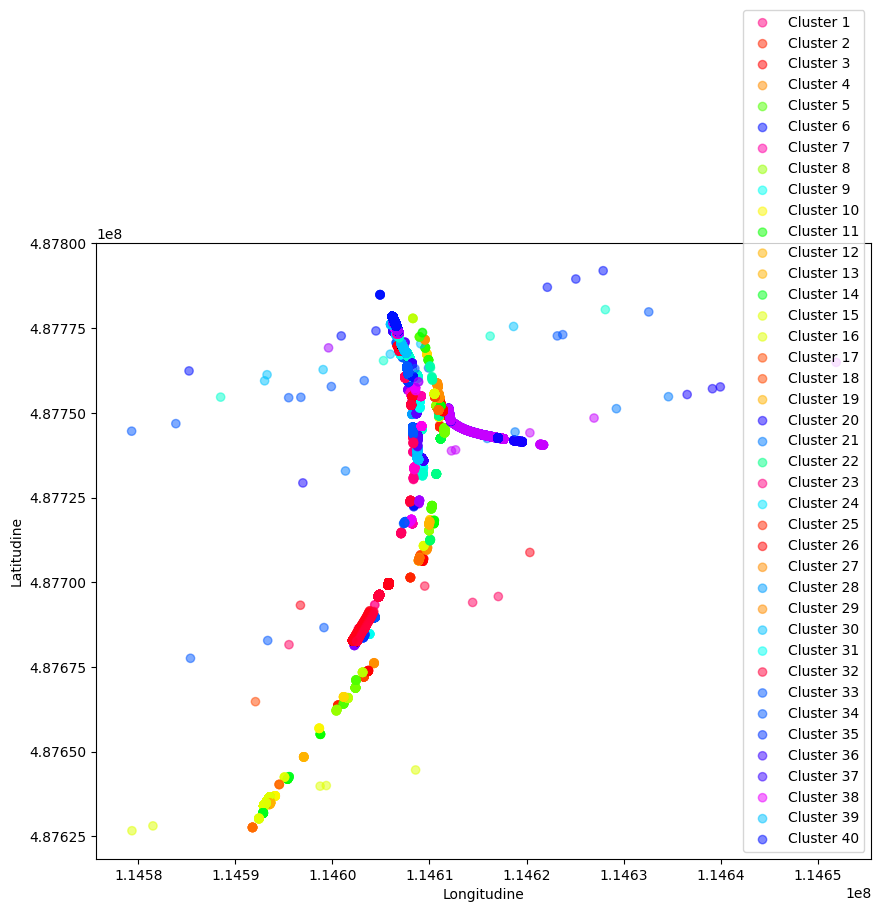

In [55]:
utils.plot_clustering(sampleD,clustersD)

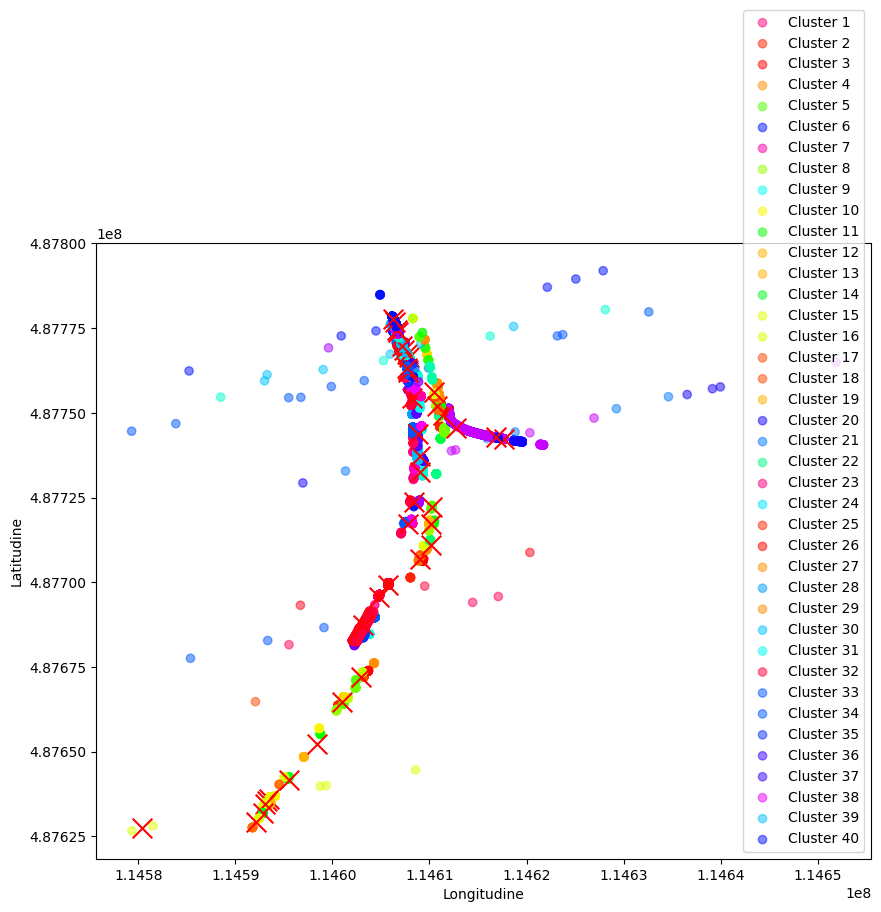

In [56]:
utils.plot_clustering_with_centroids(sampleD,clustersD,centroidsD)

7- Clustering dei dati della RSU

In [57]:
filename='datasetCamRSU.csv'
separator=';'
dataCAM_RSU= pd.read_csv(filename, sep=separator)

In [58]:
columnsnameRSU= ['source','referencePositionLat','referencePositionLong','referencePositionAlt']
data_position_RSU=dataCAM_RSU[columnsnameRSU].astype(float)

In [59]:
#sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
sampleRSU=data_position_RSU.values.tolist()
amount_initial_centersR = 2
initial_centersR = kmeans_plusplus_initializer(sampleRSU, amount_initial_centersR).initialize()
xmeans_instanceRSU = xmeans(sampleRSU, initial_centersR, 20)
xmeans_instanceRSU.process()
clustersRSU= xmeans_instanceRSU.get_clusters()
centroidsRSU= xmeans_instanceRSU.get_centers()

In [60]:
#utils.plot_clustering(sampleRSU, clustersRSU) 

In [61]:
#utils.plot_clustering_with_centroids(sampleRSU,clustersRSU, centroidsRSU)

8- Pulire il dataset in base ai parametri sul tempo

In [62]:
dataDENM.head()

,source,destination,messageID,actionID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,termination,stationType,Unnamed: 17
0,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.138700,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
1,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.138700,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
2,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.138700,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
3,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.138700,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
4,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.138700,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN


In [63]:
timecolumns = ['source', 'situation_informationQ', 'situation_eventType', 'detection_time', 'reference_time', 'simulation_time',	'eventPos_lat', 'eventPos_long', 'eventPos_alt']
datatimeDENM = dataDENM[timecolumns]

In [64]:
datatimeDENM.head()

,source,situation_informationQ,situation_eventType,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt
0,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001
1,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001
2,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001
3,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001
4,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001


In [65]:
tmcolumns = ['source', 'referencePositionLat',	'referencePositionLong',	'referencePositionAlt',	'simulationTime']
datatimeCAM = dataCAM[tmcolumns]

In [66]:
 # 1. SimTime starts from zero, we need it in ms TAI format
from datetime import datetime
import v2v

tai_sync = datetime.strptime('2004-01-01 00:00:00', '%Y-%m-%d %H:%M:%S') 
# The former value is usually based on your local timezone. We need to convert to UTC as the time used in the dataset
utc_tai_sync = datetime.utcfromtimestamp(tai_sync.timestamp()) 
temp_start_time = datetime.strptime('2017-06-26 12:00:00', '%Y-%m-%d %H:%M:%S')
new_start_time = (temp_start_time.timestamp()*1000) - (utc_tai_sync.timestamp() * 1000) 
datatimeDENM['message_reception_time'] =  (datatimeDENM['simulation_time']*1000) + new_start_time
datatimeCAM['message_reception_time'] =  (datatimeCAM['simulationTime']*1000) + new_start_time

C:\Users\Acer\AppData\Local\Temp\ipykernel_19392\2761496625.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatimeDENM['message_reception_time'] =  (datatimeDENM['simulation_time']*1000) + new_start_time
C:\Users\Acer\AppData\Local\Temp\ipykernel_19392\2761496625.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatimeCAM['message_reception_time'] =  (datatimeCAM['simulationTime']*1000) + new_start_time


In [67]:
datatimeDENM.head()


,source,situation_informationQ,situation_eventType,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,message_reception_time
0,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012
1,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012
2,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012
3,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012
4,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012


In [68]:
datatimeDENM = datatimeDENM.sort_values(by=['message_reception_time'])
datatimeCAM = datatimeCAM.sort_values(by=['message_reception_time'])

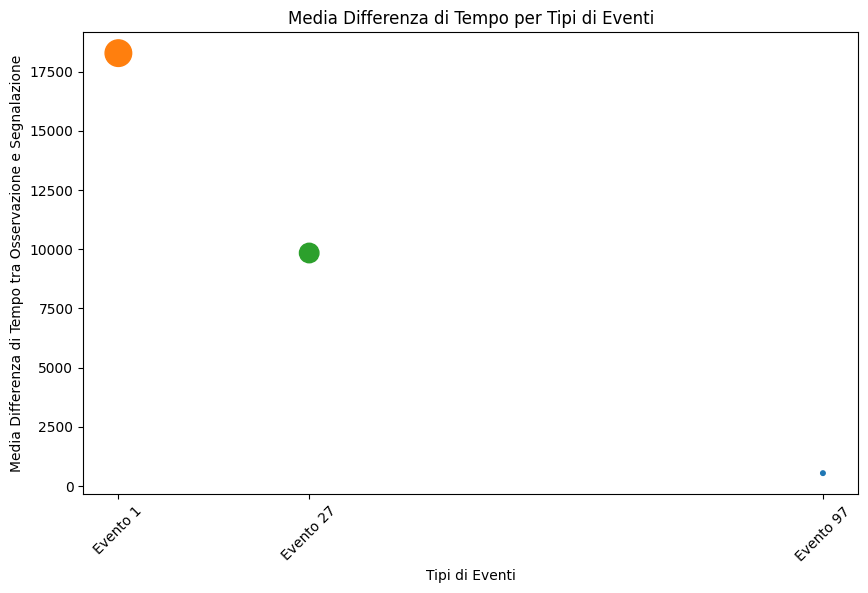

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

datatimeDENM['differenza_tempo'] = datatimeDENM['message_reception_time'] - datatimeDENM['detection_time']

tipi_di_evento = datatimeDENM['situation_eventType'].unique()

color_mapping = {}
num_color = len(tipi_di_evento)
colors = plt.cm.tab10(range(num_color))

for i, tipo_di_evento in enumerate(tipi_di_evento):
    color_mapping[tipo_di_evento] = colors[i]

grouped_data = datatimeDENM.groupby('situation_eventType')['differenza_tempo'].mean().reset_index()

plt.figure(figsize=(10, 6))
scatter = plt.scatter(grouped_data['situation_eventType'], grouped_data['differenza_tempo'], c=grouped_data['situation_eventType'].map(color_mapping), s=grouped_data['differenza_tempo'] /50)

plt.xlabel('Tipi di Eventi')
plt.ylabel('Media Differenza di Tempo tra Osservazione e Segnalazione')
plt.title('Media Differenza di Tempo per Tipi di Eventi')
plt.xticks(rotation=45) 

etichette_personalizzate = [f'Evento {i}' for i in grouped_data['situation_eventType']]
plt.xticks(grouped_data['situation_eventType'], etichette_personalizzate, rotation=45)
plt.show()

In [70]:
datatimeDENM.head()

,source,situation_informationQ,situation_eventType,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,message_reception_time,differenza_tempo
0,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012,38.700012
1,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012,38.700012
2,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012,38.700012
3,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012,38.700012
4,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012,38.700012


In [71]:
datatimeDENM= datatimeDENM.loc[datatimeDENM['situation_informationQ'] > 0.6]

In [72]:
data_position_time = datatimeDENM.astype(float)

In [73]:
sampletime=data_position_time.values.tolist()
amount_initial_centerst = 2
initial_centerst = kmeans_plusplus_initializer(sampletime, amount_initial_centerst).initialize()
xmeans_instancetime = xmeans(sampletime, initial_centerst, 3)
xmeans_instancetime.process()
clusterstime= xmeans_instancetime.get_clusters()
centroidstime= xmeans_instancetime.get_centers()

In [74]:
def plot_clustering_try(data, clusters):
    data_array = np.array(data)
    unique_event_types = np.unique(data_array[:, 4])
    num_event_types = len(unique_event_types)
    event_type_colors = plt.cm.get_cmap('hsv', num_event_types)
    event_type_color_dict = {event_type: event_type_colors(i) for i, event_type in enumerate(unique_event_types)}
    fig, ax = plt.subplots(figsize=(10, 8))
    for i, cluster in enumerate(clusters):
        cluster_data = data_array[cluster]
        cluster_event_types = cluster_data[:, 4]
        cluster_time_diffs = cluster_data[:, 5]
        cluster_colors = [event_type_color_dict[event_type] for event_type in cluster_event_types]
        ax.scatter(cluster_event_types, cluster_time_diffs, c=cluster_colors, alpha=0.5, label=f'Cluster {i+1}')
    ax.set_xticks(unique_event_types)
    ax.set_xticklabels(unique_event_types)
    
    ax.legend(loc='upper right')
    ax.set_xlabel('Tipo di Evento')
    ax.set_ylabel('Distanza di Tempo (time_diff)')
    plt.show()


In [75]:
#plot_clustering_try(datatimeDENM, clusterstime)

9- Labeling

In [76]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

sampleD = np.array(data_positionDIRTY.values.tolist())
feature_to_use = 1

#Local Outlier Factor (LOF)
contamination = 0.0001 
lof = LocalOutlierFactor(n_neighbors=40, contamination=contamination)

# Predict outliers
outlier_predictions = lof.fit_predict(sampleD[:, feature_to_use].reshape(-1, 1))

outliers = sampleD[outlier_predictions == -1]

C:\Users\Acer\AppData\Local\Temp\ipykernel_19392\4146600743.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  id_colors = plt.cm.get_cmap('hsv', num_ids)


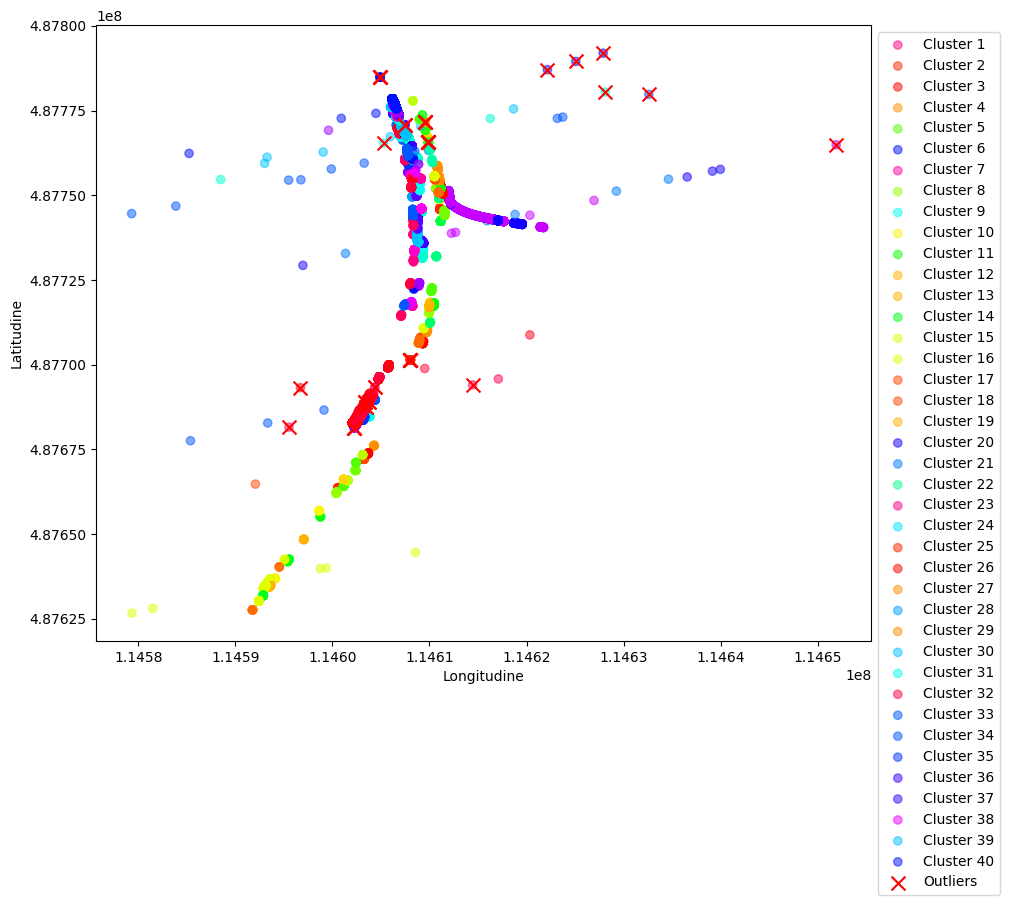

In [77]:
data_array = np.array(sampleD)
outliers = np.array(outliers)
unique_ids = np.unique(data_array[:, 0]).astype(int)
num_ids = len(unique_ids)
id_colors = plt.cm.get_cmap('hsv', num_ids)
id_color_dict = {unique_ids[i]: id_colors(i) for i in range(num_ids)}
fig, ax = plt.subplots(figsize=(10, 8))
for i, cluster in enumerate(clustersD):
        cluster_data = data_array[cluster]
        cluster_ids = cluster_data[:, 0].astype(int)
        cluster_colors = [id_color_dict[cluster_id] for cluster_id in cluster_ids]
        ax.scatter(cluster_data[:, 2], cluster_data[:, 1], c=cluster_colors, alpha=0.5, label=f'Cluster {i+1}')
ax.scatter(outliers[:, 2], outliers[:, 1], c='red', marker='x', s=100, label='Outliers')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')
plt.show()

In [78]:
datadirty.head()

,source,eventPos_lat,eventPos_long,eventPos_alt
0,166,487664759,114592072,800001
1,166,487672120,114603240,800001
2,166,487672120,114603240,800001
3,166,487672120,114603240,800001
4,166,487672120,114603240,800001


In [79]:
# Aggiungi la colonna "malicious" al DataFrame
datadirty['malicious'] = outlier_predictions == -1

C:\Users\Acer\AppData\Local\Temp\ipykernel_19392\2862287648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadirty['malicious'] = outlier_predictions == -1


In [80]:
malicious_rows = datadirty[datadirty['malicious'] == True]
print(malicious_rows)


        source  eventPos_lat  eventPos_long  eventPos_alt  malicious
29287     2090     487784880      114604910        800001       True
29728       92     487701400      114608030        800001       True
29729       92     487701400      114608030        800001       True
29730       92     487701400      114608030        800001       True
30119     2090     487784880      114604910        800001       True
30120     2090     487784870      114604910        800001       True
30121     2090     487784850      114604910        800001       True
30140       92     487701400      114608030        800001       True
30141       92     487701400      114608030        800001       True
30142       92     487701400      114608030        800001       True
30507     2090     487784870      114604910        800001       True
30508     2090     487784850      114604910        800001       True
30539       92     487701400      114608030        800001       True
30540       92     487701400      

In [81]:
malicious_rows = datadirty[datadirty['malicious'] == False]
print(malicious_rows)

        source  eventPos_lat  eventPos_long  eventPos_alt  malicious
0          166     487664759      114592072        800001      False
1          166     487672120      114603240        800001      False
2          166     487672120      114603240        800001      False
3          166     487672120      114603240        800001      False
4          166     487672120      114603240        800001      False
...        ...           ...            ...           ...        ...
595987    3052     487682610      114602500        800001      False
595988    3126     487682780      114602090        800001      False
595989    3052     487682610      114602500        800001      False
595990    3126     487682780      114602090        800001      False
595991    3052     487682610      114602500        800001      False

[595933 rows x 5 columns]
